In [1]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# Gene annotation

# MR

In [67]:
AD_sig_mr = fread("~/project/image_QTL/twas/AD_mr.sig_gene.tsv.gz")
# AD_sig_mr = unique(AD_sig_mr)
AD_sig_mr = AD_sig_mr |> rename(gene_id = gene_name)
AD_sig_mr_raw = AD_sig_mr |> select(gene_id, everything())
fwrite(AD_sig_mr_raw, "~/AD_mr_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./AD_mr_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [68]:
annotate_AD_mr = fread('~/AD_mr_gene_list.gene_list.tsv') 

In [69]:
head(annotate_AD_mr)
dim(annotate_AD_mr)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,944202,959308,ENSG00000188976,-,NOC2L
chr1,975203,982092,ENSG00000187642,-,PERM1
chr1,998961,1000171,ENSG00000188290,-,HES4
chr1,1020119,1056117,ENSG00000188157,+,AGRN
chr1,1081817,1116360,ENSG00000131591,-,C1orf159
chr1,1203507,1206591,ENSG00000186891,-,TNFRSF18


[1] 6058    6

In [70]:
TL1_sig_mr = fread("~/project/image_QTL/twas/TL1_mr.sig_gene.tsv.gz")
# TL1_sig_mr = unique(TL1_sig_mr)
TL1_sig_mr = TL1_sig_mr |> rename(gene_id = gene_name)
TL1_sig_mr_raw = TL1_sig_mr |> select(gene_id, everything())
fwrite(TL1_sig_mr_raw, "~/TL1_mr_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./TL1_mr_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [71]:
annotate_TL1_mr = fread('~/TL1_mr_gene_list.gene_list.tsv') 

In [72]:
head(annotate_TL1_mr)
dim(annotate_TL1_mr)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,1020119,1056117,ENSG00000188157,+,AGRN
chr1,1081817,1116360,ENSG00000131591,-,C1orf159
chr1,1418419,1421768,ENSG00000235098,-,ANKRD65
chr1,3454664,3481112,ENSG00000130762,+,ARHGEF16
chr1,3487950,3611507,ENSG00000162591,-,MEGF6
chr1,3889124,3900277,ENSG00000198912,-,C1orf174


[1] 2667    6

# TWAS

In [29]:
TL1 = fread("~/project/image_QTL/twas/TL1_gene_list.tsv")
TL1_gene = TL1$gene_id
TL1 = TL1 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
TL1_raw = TL1 |> select(gene_id, source)
fwrite(TL1_raw, "~/TL1_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./TL1_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [30]:
annotate_TL1 = fread('~/TL1_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
TL1_annotated = TL1 |> inner_join(annotate_TL1, by="gene_id")

In [31]:
head(TL1_annotated)
dim(TL1_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr10,103268872,105304950,ENSG00000065621,TWAS,GSTO2
chr10,99320000,102783413,ENSG00000107833,TWAS,NPM3
chr10,102877569,104918184,ENSG00000107960,TWAS,STN1
chr10,103309698,105338465,ENSG00000148841,TWAS,ITPRIP
chr10,3080000,7840000,ENSG00000057608,TWAS,GDI2
chr10,3080000,7840000,ENSG00000108021,TWAS,TASOR2


[1] 1485    6

In [7]:
DNE_annotated = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv", sep = '\t')
TL1_annotated = TL1_annotated |> mutate(event_id = "TL1") |> select(event_id, everything())
DNE_annotated = bind_rows(DNE_annotated, TL1_annotated)
fwrite(DNE_annotated, "~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv", sep = '\t')

In [3]:
AD1 = fread("~/project/image_QTL/twas/image_AD1_gene_list.tsv")
AD1_gene = AD1$gene_id
AD1 = AD1 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
AD1_raw = AD1 |> select(gene_id, source)
fwrite(AD1_raw, "~/image_AD1_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_AD1_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [32]:
annotate_AD1 = fread('~/image_AD1_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
AD1_annotated = AD1 |> inner_join(annotate_AD1, by="gene_id")

In [33]:
head(AD1_annotated)
dim(AD1_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr14,99238297,101760000,ENSG00000100811,TWAS,YY1
chr20,34433347,37080000,ENSG00000125965,TWAS,GDF5
chr3,46413681,50320000,ENSG00000114650,TWAS,SCAP
chr8,9840000,12600000,ENSG00000104643,TWAS,MTMR9
chr10,101673731,103714397,ENSG00000138175,TWAS,ARL3
chr10,101644478,103680000,ENSG00000171206,TWAS,TRIM8


[1] 75  6

In [7]:
AD2 = fread("~/project/image_QTL/twas/image_AD2_gene_list.tsv")
AD2_gene = AD2$gene_id
AD2 = AD2 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
AD2_raw = AD2 |> select(gene_id, source)
fwrite(AD2_raw, "~/image_AD2_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_AD2_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [8]:
annotate_AD2 = fread('~/image_AD2_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
AD2_annotated = AD2 |> inner_join(annotate_AD2, by="gene_id")

In [10]:
head(AD2_annotated)
dim(AD2_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr12,63507000,66160000,ENSG00000153179,TWAS,RASSF3
chr12,64169582,66248355,ENSG00000174106,TWAS,LEMD3
chr12,63404391,66160000,ENSG00000184575,TWAS,XPOT
chr20,34433347,37080000,ENSG00000125965,TWAS,GDF5
chr2,231479827,235760000,ENSG00000171551,TWAS,ECEL1
chr6,25960000,30480000,ENSG00000276302,TWAS,AL021997.2


[1] 103   6

In [11]:
Aging1 = fread("~/project/image_QTL/twas/image_Aging1_gene_list.tsv")
Aging1_gene = Aging1$gene_id
Aging1 = Aging1 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
Aging1_raw = Aging1 |> select(gene_id, source)
fwrite(Aging1_raw, "~/image_Aging1_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_Aging1_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [13]:
annotate_Aging1 = fread('~/image_Aging1_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
Aging1_annotated = Aging1 |> inner_join(annotate_Aging1, by="gene_id")

In [14]:
head(Aging1_annotated)
dim(Aging1_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr16,25040000,34000000,ENSG00000176953,TWAS,NFATC2IP
chr16,25040000,34000000,ENSG00000178952,TWAS,TUFM
chr16,25040000,34000000,ENSG00000188603,TWAS,CLN3
chr16,25040000,34000000,ENSG00000196502,TWAS,SULT1A1
chr16,25040000,34000000,ENSG00000196993,TWAS,NPIPB9
chr16,25040000,34000000,ENSG00000205609,TWAS,EIF3CL


[1] 150   6

In [15]:
Aging2 = fread("~/project/image_QTL/twas/image_Aging2_gene_list.tsv")
Aging2_gene = Aging2$gene_id
Aging2 = Aging2 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
Aging2_raw = Aging2 |> select(gene_id, source)
fwrite(Aging2_raw, "~/image_Aging2_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_Aging2_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [16]:
annotate_Aging2 = fread('~/image_Aging2_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
Aging2_annotated = Aging2 |> inner_join(annotate_Aging2, by="gene_id")

In [18]:
head(Aging2_annotated)
dim(Aging2_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr12,115920000,118120000,ENSG00000088992,TWAS,TESC
chr12,115856144,117881441,ENSG00000135116,TWAS,HRK
chr12,64169582,66248355,ENSG00000174106,TWAS,LEMD3
chr12,63404391,66160000,ENSG00000184575,TWAS,XPOT
chr16,28360000,34000000,ENSG00000090238,TWAS,YPEL3
chr16,28360000,34000000,ENSG00000102882,TWAS,MAPK3


[1] 100   6

In [19]:
Aging3 = fread("~/project/image_QTL/twas/image_Aging3_gene_list.tsv")
Aging3_gene = Aging3$gene_id
Aging3 = Aging3 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
Aging3_raw = Aging3 |> select(gene_id, source)
fwrite(Aging3_raw, "~/image_Aging3_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_Aging3_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [20]:
annotate_Aging3 = fread('~/image_Aging3_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
Aging3_annotated = Aging3 |> inner_join(annotate_Aging3, by="gene_id")

In [21]:
head(Aging3_annotated)
dim(Aging3_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr2,53456316,55680000,ENSG00000115306,TWAS,SPTBN1
chr16,28360000,34000000,ENSG00000102886,TWAS,GDPD3
chr6,125340114,127680000,ENSG00000203760,TWAS,CENPW
chr14,56480000,60600000,ENSG00000032219,TWAS,ARID4A
chr14,56480000,60600000,ENSG00000100567,TWAS,PSMA3
chr1,214005774,216237090,ENSG00000082482,TWAS,KCNK2


[1] 68  6

In [22]:
Aging4 = fread("~/project/image_QTL/twas/image_Aging4_gene_list.tsv")
Aging4_gene = Aging4$gene_id
Aging4 = Aging4 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
Aging4_raw = Aging4 |> select(gene_id, source)
fwrite(Aging4_raw, "~/image_Aging4_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_Aging4_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [23]:
annotate_Aging4 = fread('~/image_Aging4_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
Aging4_annotated = Aging4 |> inner_join(annotate_Aging4, by="gene_id")

In [24]:
head(Aging4_annotated)
dim(Aging4_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,201840000,206775482,ENSG00000117280,TWAS,RAB29
chr1,201840000,206850132,ENSG00000162877,TWAS,PM20D1
chr10,86960000,90880000,ENSG00000204010,TWAS,IFIT1B
chr17,66200000,69280000,ENSG00000182481,TWAS,KPNA2
chr19,32720000,43520000,ENSG00000126267,TWAS,COX6B1
chr19,32720000,43520000,ENSG00000105668,TWAS,UPK1A


[1] 59  6

In [25]:
Aging5 = fread("~/project/image_QTL/twas/image_Aging5_gene_list.tsv")
Aging5_gene = Aging5$gene_id
Aging5 = Aging5 |> mutate(source = ifelse(gene_name == "" | is.na(gene_name), "TWAS", "QTL")) |> select(-gene_name)
Aging5_raw = Aging5 |> select(gene_id, source)
fwrite(Aging5_raw, "~/image_Aging5_gene_list.txt", sep = '\t')

In [ ]:
sos run xqtl-protocol/code/data_preprocessing/phenotype/gene_annotation.ipynb annotate_coord \
    --cwd ./ \
    --phenoFile ./image_Aging5_gene_list.txt \
    --phenotype-id-column gene_id \
    --molecular-trait-type gene \
    --coordinate-annotation data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.ERCC.gtf

In [26]:
annotate_Aging5 = fread('~/image_Aging5_gene_list.gene_list.tsv') |> select(gene_id, gene_name)
Aging5_annotated = Aging5 |> inner_join(annotate_Aging5, by="gene_id")

In [27]:
head(Aging5_annotated)
dim(Aging5_annotated)

#chr,start,end,gene_id,source,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr10,102040000,104592552,ENSG00000107954,TWAS,NEURL1
chr10,101918293,104090222,ENSG00000148842,TWAS,CNNM2
chr10,101869469,103901899,ENSG00000214435,TWAS,AS3MT
chr17,46320000,50760000,ENSG00000159199,TWAS,ATP5MC1
chr19,35640000,43520000,ENSG00000171747,TWAS,LGALS4
chr19,35640000,43520000,ENSG00000182472,TWAS,CAPN12


[1] 167   6

In [34]:
combined_df <- bind_rows(
  image_AD1 = AD1_annotated,
  image_AD2 = AD2_annotated,
  image_Aging1 = Aging1_annotated,
  image_Aging2 = Aging2_annotated,
  image_Aging3 = Aging3_annotated,
  image_Aging4 = Aging4_annotated,
  image_Aging5 = Aging5_annotated,
    TL1 = TL1_annotated,
  .id = "event_id"
)

In [36]:
fwrite(combined_df, "~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv", sep = '\t')

In [37]:
combined_df |> count(gene_name) |> filter(n>1) |> arrange(desc(n))

gene_name,n
<chr>,<int>
CENPW,6
AMZ1,5
GNA12,5
PINX1,5
BCL2L1,4
C4B,4
CCDC12,4
GDF5,4
GDPD3,4


# gene_overlap

In [62]:
all = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv")
AD1 = all |> filter(str_detect(event_id,"image_AD1"))
AD2 = all |> filter(str_detect(event_id,"image_AD2"))
Aging1 = all |> filter(str_detect(event_id,"image_Aging1"))
Aging2 = all |> filter(str_detect(event_id,"image_Aging2"))
Aging3 = all |> filter(str_detect(event_id,"image_Aging3"))
Aging4 = all |> filter(str_detect(event_id,"image_Aging4"))
Aging5 = all |> filter(str_detect(event_id,"image_Aging5"))
TL1 = all |> filter(str_detect(event_id,"TL1"))


In [63]:
all |> filter(gene_name == "NBEAL2")

#chr,start,end,gene_id,source,gene_name,event_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
chr3,44920000,50320000,ENSG00000160796,TWAS,NBEAL2,image_AD1
chr3,46979665,47009703,ENSG00000160796,QTL,NBEAL2,image_AD1
chr3,46979665,47009703,ENSG00000160796,QTL,NBEAL2,image_Aging5


In [64]:
Aging1_gene = Aging1$gene_name |> unique()

Aging2_gene = Aging2$gene_name|> unique()

Aging3_gene = Aging3$gene_name|> unique()

Aging4_gene = Aging4$gene_name|> unique()

Aging5_gene = Aging5$gene_name|> unique()

TL1_gene = TL1$gene_name|> unique()

AD1_gene = AD1$gene_name|> unique()
AD2_gene = AD2$gene_name|> unique()


In [65]:
AD1_gene

[1] "YY1"      "GDF5"     "SCAP"     "MTMR9"    "ARL3"     "TRIM8"   
 [7] "KLHL18"   "NBEAL2"   "KIF9"     "KLHDC8B"  "SUFU"     "PDCD11"  
[13] "ARID4A"   "PSMA3"    "JKAMP"    "DAAM1"    "PDE8A"    "LGALS1"  
[19] "CCDC12"   "SETD2"    "PTPN23"   "DHX30"    "PLXNB1"   "IMPDH2"  
[25] "CAMKV"    "MON1A"    "USP19"    "LSMEM2"   "XKR6"     "ENPP2"   
[31] "CCN3"     "MSRA"     "MFSD13A"  "PI4KA"    "ELP6"     "MAP4"    
[37] "SMARCC1"  "PINX1"    "CTSB"     "ERI1"     "MFHAS1"   "ARMH4"   
[43] "KIAA0586" "ARL4C"    "CSPG5"    "UGT2B7"   "KIF13A"   "AMZ1"    
[49] "GNA12"    "EGFR"     "SBSPON"   "THNSL1"   "ACTR1A"   "KDM2B"   
[55] "UQCC1"    "EEF2"     "PIAS4"    "SERPIND1" "SNAP29"   "ADORA2A"

In [66]:
AD2_gene

[1] "RASSF3"         "LEMD3"          "XPOT"           "GDF5"          
  [5] "ECEL1"          "AL021997.2"     "ZNF311"         "MDK"           
  [9] "TESC"           "FBXW8"          "PAN2"           "TBK1"          
 [13] "NPIPB13"        "CNTD1"          "VAT1"           "ARL4D"         
 [17] "RUNDC3A"        "G6PC3"          "MAP3K14"        "KANSL1"        
 [21] "ARL17A"         "STH"            "TCEA3"          "PHF20"         
 [25] "ERGIC3"         "CDC25C"         "H2AC4"          "CSNK2B"        
 [29] "LY6G6C"         "C4B"            "NKAPD1"         "C11orf49"      
 [33] "RNFT2"          "RETREG3"        "AARSD1"         "BRCA1"         
 [37] "DUSP3"          "CCDC200"        "FAM171A2"       "C1QL1"         
 [41] "NMT1"           "HEXIM1"         "LRRC37A"        "LRRC37A2"      
 [45] "NSF"            "MAEL"           "ASAP3"          "NFS1"          
 [49] "ZNF142"         "CNOT9"          "SPEG"           "SPTBN1"        
 [53] "CYFIP2"         "MAST4"          "TMEM170B"       "TRMT11"        
 [57] "H4C13"          "ZKSCAN4"        "ZKSCAN3"        "MSH5"          
 [61] "FBXO21"         "MSRB3"          "TUBG2"          "HDAC5"         
 [65] "PLEKHM1"        "FAF1"           "PLCD4"          "NACAD"         
 [69] "PINX1"          "SEMA4D"         "ZNF322"         "ERO1B"         
 [73] "DIS3L2"         "AP3B1"          "VCAN"           "CYSTM1"        
 [77] "TNIP1"          "H2AC11"         "FILIP1"         "CCM2"          
 [81] "TBRG4"          "DGKZ"           "ATG13"          "CKAP5"         
 [85] "LRP4"           "PACSIN3"        "NR1H3"          "ZDHHC5"        
 [89] "AP001931.2"     "TMX2"           "CTNND1"         "DPCD"          
 [93] "NABP2"          "ANKRD52"        "COQ10A"         "CS"            
 [97] "CNPY2"          "IL23A"          "STAT2"          "SOHLH2"        
[101] "CCDC169-SOHLH2" "CCDC169"        "SPART"          "CCDC57"        
[105] "UQCC1"

In [67]:
Aging1_gene

[1] "NFATC2IP"   "TUFM"       "CLN3"       "SULT1A1"    "NPIPB9"    
  [6] "EIF3CL"     "LAT"        "NPIPB7"     "RUSF1"      "COG4"      
 [11] "SF3B3"      "MTSS2"      "KPNA2"      "MYLK2"      "ID1"       
 [16] "ZCWPW1"     "MEPCE"      "FAT3"       "CHPT1"      "WASHC3"    
 [21] "PMCH"       "PARPBP"     "KTN1"       "MAPK1IP1L"  "NUPR1"     
 [26] "AC138894.1" "EIF3C"      "NOL11"      "TAS1R3"     "NINL"      
 [31] "COX4I2"     "C20orf194"  "ASXL1"      "PDCD6IP"    "EXOC3"     
 [36] "CYP21A2"    "TSC22D4"    "DSCAML1"    "PELI2"      "WDHD1"     
 [41] "PPP4R3A"    "PDXDC1"     "TNRC6A"     "SLC5A11"    "APOBR"     
 [46] "NPIPB6"     "ATXN2L"     "SGF29"      "RABEP2"     "SH2B1"     
 [51] "ATP2A1"     "HIRIP3"     "SEZ6L2"     "FBXL19"     "ZNF768"    
 [56] "SLC9A5"     "NOL3"       "TMEM208"    "NRN1L"      "NFAT5"     
 [61] "ZNRF1"      "HELZ"       "PRKCZ"      "PYGB"       "HM13"      
 [66] "BCL2L1"     "FOXS1"      "NLRC4"      "ZIC4"       "KLF3"      
 [71] "POLR2B"     "SEC31A"     "APOM"       "DNAJC2"     "STAG3"     
 [76] "NYAP1"      "TNFRSF11B"  "SLC20A2"    "SETD1A"     "DYRK1B"    
 [81] "ATRN"       "ITPA"       "ZNF717"     "CD101"      "ZIC1"      
 [86] "IGFBP7"     "ENOPH1"     "LIN54"      "AHRR"       "SLC9A3"    
 [91] "HLA-A"      "TRIM39"     "COL21A1"    "CENPW"      "TULP4"     
 [96] "TMEM181"    "SOD2"       "WTAP"       "ACAT2"      "TCP1"      
[101] "MRPL18"     "PNLDC1"     "AMZ1"       "GNA12"      "PILRB"     
[106] "PILRA"      "C7orf61"    "FAM160B2"   "EFCAB1"     "SAA4"      
[111] "SAA2"       "HPS5"       "GTF2H1"     "ENO4"       "SHTN1"     
[116] "CNTN1"      "EIF2B2"     "MLH3"       "ACYP1"      "ZC2HC1C"   
[121] "NEK9"       "TMED10"     "NPIPA1"     "NPIPA5"     "SULT1A2"   
[126] "DYNC1LI2"   "ATP9B"      "SLC4A11"    "DNAJC5"

In [68]:
Aging2_gene

[1] "TESC"           "HRK"            "LEMD3"          "XPOT"          
 [5] "YPEL3"          "MAPK3"          "INO80E"         "ASPHD1"        
 [9] "H6PD"           "ZNF786"         "LHPP"           "EEF1AKMT2"     
[13] "MDK"            "FBXW8"          "PAN2"           "MSRB3"         
[17] "GDPD3"          "TBX6"           "TMEM219"        "C16orf54"      
[21] "NPIPB13"        "TERF2"          "NSRP1"          "SSH2"          
[25] "EFCAB5"         "MAP3K14"        "SMG8"           "CENPW"         
[29] "ZRANB1"         "AC068896.1"     "RNFT2"          "NPIPB12"       
[33] "SLX1B"          "PPP4C"          "DOC2A"          "TAOK2"         
[37] "SEZ6L2"         "KCTD13"         "PYCARD"         "RHOT1"         
[41] "PPM1E"          "MAEL"           "RNF11"          "SLC35D1"       
[45] "BCL2L1"         "TANK"           "SLC9B1"         "VCAN"          
[49] "RSPO3"          "ZNF398"         "NACAD"          "XKR6"          
[53] "FBXO21"         "LRRC37B"        "FAF1"           "PLCG1"         
[57] "TMEM170B"       "PINX1"          "MAST2"          "DOCK10"        
[61] "ARL4C"          "MAST4"          "TNIP1"          "RPA3"          
[65] "FAM126A"        "KLHL7"          "NUP42"          "GPNMB"         
[69] "C7orf33"        "ZNF425"         "WAC"            "SYT10"         
[73] "DYRK2"          "WASHC3"         "PARPBP"         "SOHLH2"        
[77] "CCDC169-SOHLH2" "CCDC169"        "SPART"          "NPIPA1"        
[81] "CORO6"          "MTMR4"          "RAD51C"         "TRIM37"

In [69]:
Aging3_gene

[1] "SPTBN1"          "GDPD3"           "CENPW"           "ARID4A"         
 [5] "PSMA3"           "KCNK2"           "ECSCR"           "RSPO3"          
 [9] "TRIM26"          "TNF"             "VEGFA"           "XKR6"           
[13] "ERI1"            "MSRB3"           "GGT7"            "NCOA6"          
[17] "BIN1"            "PINX1"           "MFHAS1"          "TUT7"           
[21] "HSPG2"           "CDC42"           "UGT2B7"          "ISCA1"          
[25] "ENO4"            "SHTN1"           "KDM2B"           "IRS2"           
[29] "ARMH4"           "SEZ6L2"          "ASPHD1"          "KCTD13"         
[33] "TMEM219"         "MAPK3"           "PTGES3L-AARSD1"  "ARHGAP27"       
[37] "PLEKHM1"         "LINC02210-CRHR1" "CRHR1"           "SPPL2C"         
[41] "MAPT"            "STH"             "KANSL1"          "ARL17B"         
[45] "LRRC37A"         "LRRC37A2"        "ARL17A"          "NSF"            
[49] "AC005670.2"      "ITCH"            "MAP1LC3A"        "TRPC4AP"        
[53] "DNAJC5"          "DDX17"           "FAM227A"         "CBY1"           
[57] "TOMM22"          "JOSD1"           "SUN2"            "HSF2BP"         
[61] "RRP1B"           "PDXK"

In [70]:
Aging4_gene

[1] "RAB29"          "PM20D1"         "IFIT1B"         "KPNA2"         
 [5] "COX6B1"         "UPK1A"          "CFAP74"         "SLC26A9"       
 [9] "RAB7B"          "IQCJ-SCHIP1"    "STN1"           "TOX3"          
[13] "SSH2"           "EVI2A"          "ATP9B"          "FFAR2"         
[17] "KMT2B"          "TAF13"          "SLC41A1"        "KCNK2"         
[21] "PRPF4B"         "IRF2BP2"        "CTSE"           "RHEX"          
[25] "ERO1B"          "GFM1"           "AP3B1"          "BMP6"          
[29] "TXNDC5"         "BLOC1S5-TXNDC5" "SUPT3H"         "AMZ1"          
[33] "GNA12"          "ENPP2"          "FAT3"           "SLC36A4"       
[37] "TCF7L2"         "NABP2"          "ANKRD52"        "COQ10A"        
[41] "CS"             "CNPY2"          "PAN2"           "IL23A"         
[45] "STAT2"          "BPTF"           "TPGS2"          "KIAA1328"      
[49] "ZBTB32"         "PROSER3"        "COQ8B"

In [71]:
Aging5_gene

[1] "NEURL1"      "CNNM2"       "AS3MT"       "ATP5MC1"     "LGALS4"     
  [6] "CAPN12"      "TMCC2"       "CARF"        "NBEAL1"      "ICA1L"      
 [11] "ZNF184"      "BTN3A3"      "H2BC15"      "H4C12"       "AL021997.2" 
 [16] "ZNF311"      "MRPS18B"     "PRRT1"       "EHMT2"       "MPIG6B"     
 [21] "GPANK1"      "CLIC1"       "SAPCD1"      "C4A"         "HLA-DRA"    
 [26] "AL662884.4"  "HLA-DMA"     "TAP2"        "CYP17A1"     "NOLC1"      
 [31] "RPEL1"       "CALHM2"      "CALHM1"      "PTPRJ"       "UBE2Z"      
 [36] "SNF8"        "GNGT2"       "TIMM50"      "MIA"         "CNTN2"      
 [41] "C1QB"        "TRIOBP"      "FAM117B"     "U2SURP"      "H3C2"       
 [46] "HFE"         "H4C3"        "H2AC4"       "PPP1R18"     "FLOT1"      
 [51] "TUBB"        "VARS2"       "C6orf47"     "CSNK2B"      "LY6G6C"     
 [56] "HSPA1A"      "C4B"         "RNF5"        "BTRC"        "FBXL15"     
 [61] "ARL3"        "PDCD11"      "PCGF6"       "BORCS7"      "COL17A1"    
 [66] "TLCD5"       "ARHGEF12"    "TMEM101"     "DUSP3"       "CALCOCO2"   
 [71] "ZNF568"      "RBBP5"       "DSTYK"       "TMEM81"      "RGPD4"      
 [76] "WDR12"       "RAPH1"       "H4C13"       "ZKSCAN4"     "ZKSCAN3"    
 [81] "DDR1"        "ATP6V1G2"    "TNF"         "BAG6"        "PRRC2A"     
 [86] "MSH5"        "MSH5-SAPCD1" "SKIV2L"      "AGER"        "PBX2"       
 [91] "HLA-DMB"     "AL645941.2"  "BRD2"        "RXRB"        "GNA12"      
 [96] "AMZ1"        "TNFRSF11B"   "NT5C2"       "WBP1L"       "LDB1"       
[101] "TRIM38"      "HMGN4"       "ZSCAN23"     "CUTA"        "NOP58"      
[106] "KIAA2012"    "BMPR2"       "SULT1C4"     "GCC2"        "LIMS1"      
[111] "RANBP2"      "NUP210"      "NR2C2"       "RARB"        "CCDC12"     
[116] "NBEAL2"      "SCAP"        "ELP6"        "STIMATE"     "EPHA3"      
[121] "BTN2A1"      "ZKSCAN8"     "TRIM31"      "VWA7"        "CYP21A2"    
[126] "TNXB"        "FUT9"        "UFL1"        "FHL5"        "CENPW"      
[131] "DENND2B"     "AKIP1"       "TMEM9B"      "IRAG1"       "MYRF"       
[136] "TMEM258"     "FADS2"       "FADS1"       "MARK2"       "SYNPO2L"    
[141] "VCL"         "ADK"         "RHBDF1"      "VPS9D1"      "EFCAB13"    
[146] "LRRC46"      "TTLL6"       "SEPTIN9"     "CCDC9"       "C5AR1"      
[151] "FAM118A"

In [72]:
intersect(TL1$gene_name, Aging3$gene_name)

[1] "DNAJC5"  "GGT7"    "NCOA6"   "TRIM26"  "DDX17"   "FAM227A" "CBY1"   
 [8] "TOMM22"  "JOSD1"   "SUN2"

In [74]:
intersect(AD1$gene_name, TL1$gene_name)

[1] "PLXNB1" "MON1A"  "LSMEM2" "MAP4"

In [76]:
intersect(AD1_gene, Aging1_gene)

[1] "AMZ1"  "GNA12"

In [77]:
intersect(AD1_gene, Aging2_gene)

[1] "XKR6"  "PINX1" "ARL4C"

In [78]:
intersect(AD1_gene, Aging3_gene)

[1] "ARID4A" "PSMA3"  "XKR6"   "PINX1"  "ERI1"   "MFHAS1" "ARMH4"  "UGT2B7"
[9] "KDM2B"

In [79]:
intersect(AD1_gene, Aging4_gene)

[1] "ENPP2" "AMZ1"  "GNA12"

In [80]:
intersect(AD1_gene, Aging5_gene)

[1] "SCAP"   "ARL3"   "NBEAL2" "PDCD11" "CCDC12" "ELP6"   "AMZ1"   "GNA12"

In [81]:
intersect(Aging3_gene, Aging5_gene)

[1] "CENPW" "TNF"

CENPV is deubiquitylated by CYLD and localizes in interphase to primary cilia where it increases the ciliary levels of acetylated α-tubulin.
Cenpj, a protein that is required for centriole biogenesis, plays a role in regulating cilium disassembly in vivo..
CENPW's role in cillia is less direct and well-characterized.

In [82]:
intersect(AD1_gene, AD2_gene)

[1] "GDF5"  "PINX1" "UQCC1"

no overlap between AD2 and image_Aging1, Aging3 or Aging5

In [83]:
intersect(Aging1_gene, AD2_gene)

character(0)

In [84]:
intersect(Aging2_gene, AD2_gene)

[1] "TESC"           "LEMD3"          "XPOT"           "MDK"           
 [5] "FBXW8"          "PAN2"           "MSRB3"          "NPIPB13"       
 [9] "MAP3K14"        "RNFT2"          "MAEL"           "VCAN"          
[13] "NACAD"          "FBXO21"         "FAF1"           "TMEM170B"      
[17] "PINX1"          "MAST4"          "TNIP1"          "SOHLH2"        
[21] "CCDC169-SOHLH2" "CCDC169"        "SPART"

Loss-of-function mutations in the SPART gene cause Troyer syndrome, a recessive form of spastic paraplegia resulting in muscle weakness, short stature, and cognitive defects. SPART encodes for Spartin, a protein linked to endosomal trafficking and mitochondrial membrane potential maintenance. Here, we identified with whole exome sequencing (WES) a novel frameshift mutation in the SPART gene in 2 brothers presenting an uncharacterized developmental delay and short stature. Functional characterization in an SH-SY5Y cell model shows that this mutation is associated with increased neurite outgrowth. These cells also show a marked decrease in mitochondrial complex I (NADH dehydrogenase) activity, coupled to decreased ATP synthesis and defective mitochondrial membrane potential. The cells also presented an increase in reactive oxygen species, extracellular pyruvate, and NADH levels, consistent with impaired complex I activity. In concordance with a severe mitochondrial failure, Spartin loss also led to an altered intracellular Ca2+ homeostasis that was restored after transient expression of wild-type Spartin. 

In [85]:
intersect(Aging3_gene, AD2_gene)

[1] "SPTBN1"   "MSRB3"    "PINX1"    "PLEKHM1"  "STH"      "KANSL1"  
 [7] "LRRC37A"  "LRRC37A2" "ARL17A"   "NSF"

In [86]:
intersect(Aging4_gene, AD2_gene)

[1] "ERO1B"   "AP3B1"   "NABP2"   "ANKRD52" "COQ10A"  "CS"      "CNPY2"  
 [8] "PAN2"    "IL23A"   "STAT2"

In [87]:
intersect(Aging5_gene, AD2_gene)

[1] "AL021997.2" "ZNF311"     "H2AC4"      "CSNK2B"     "LY6G6C"    
 [6] "C4B"        "DUSP3"      "H4C13"      "ZKSCAN4"    "ZKSCAN3"   
[11] "MSH5"

In [88]:
intersect(Aging3_gene, Aging1_gene)

[1] "CENPW"  "ENO4"   "SHTN1"  "SEZ6L2" "DNAJC5"

In [89]:
intersect(Aging5_gene, 'H4C12')

[1] "H4C12"

In [54]:
library(UpSetR)
# Create named list of gene sets
gene_sets <- list(
  "AD1" = AD1_gene,
  "AD2" = AD2_gene, 
  "Aging1" = Aging1_gene,
  "Aging2" = Aging2_gene,
  "Aging3" = Aging3_gene,
  "Aging4" = Aging4_gene,
  "Aging5" = Aging5_gene,
  "AD" = AD_gene,
  "Telomere_Length_PC1" = TL1_gene,
  "mvAge" = mvAge_gene,
  "PD" = PD_gene
)

# Remove any NA values
gene_sets <- lapply(gene_sets, function(x) x[!is.na(x)])
# Convert to binary matrix for UpSet plot
all_genes <- unique(unlist(gene_sets))
upset_data <- data.frame(gene = all_genes)

for(set_name in names(gene_sets)) {
  upset_data[[set_name]] <- upset_data$gene %in% gene_sets[[set_name]]
}
str(gene_sets)
# Convert to proper format for UpSetR
upset_r_data <- upset_data
# Remove the 'gene' column and convert to 0/1 instead of TRUE/FALSE
upset_r_data <- upset_r_data[, -1]  # Remove gene column
upset_r_data <- as.data.frame(lapply(upset_r_data, as.numeric))

# Add row names if needed
rownames(upset_r_data) <- upset_data$gene

# Create UpSetR plot with proper error handling
tryCatch({
  upset_r_plot <- upset(upset_r_data, 
                       sets = names(gene_sets),
                       order.by = "freq",
                       decreasing = TRUE,
                       mb.ratio = c(0.6, 0.4),
                       number.angles = 0,
                       text.scale = 1.2,
                       point.size = 3,
                       line.size = 1.5,
                       mainbar.y.label = "Intersection Size",
                       sets.x.label = "Gene Set Size",
                       sets.bar.color = "steelblue",
                       main.bar.color = "darkblue")
  
  cat("UpSetR plot created successfully\n")
}, error = function(e) {
  cat("UpSetR failed, using alternative method\n")
  
  # Alternative: Create a simple intersection matrix
  intersection_matrix <- matrix(0, nrow = length(unique(DNE$gene_name)), ncol = length(gene_sets))
  rownames(intersection_matrix) <- unique(DNE$gene_name)
  colnames(intersection_matrix) <- names(gene_sets)
  
  for(i in 1:length(gene_sets)) {
    intersection_matrix[unique(DNE$gene_name) %in% gene_sets[[i]], i] <- 1
  }
  
  print(head(intersection_matrix))
})


ERROR: Error: object 'AD_gene' not found


In [27]:
png("~/xqtl-analysis/production/image_QTL/interested_genes/CB_M1/DNE/all_gene_overlap_upset_plot.png", width = 12, height = 8, units = "in", res = 300)
print(upset_r_plot)
dev.off()


agg_record_90406976 
                  2

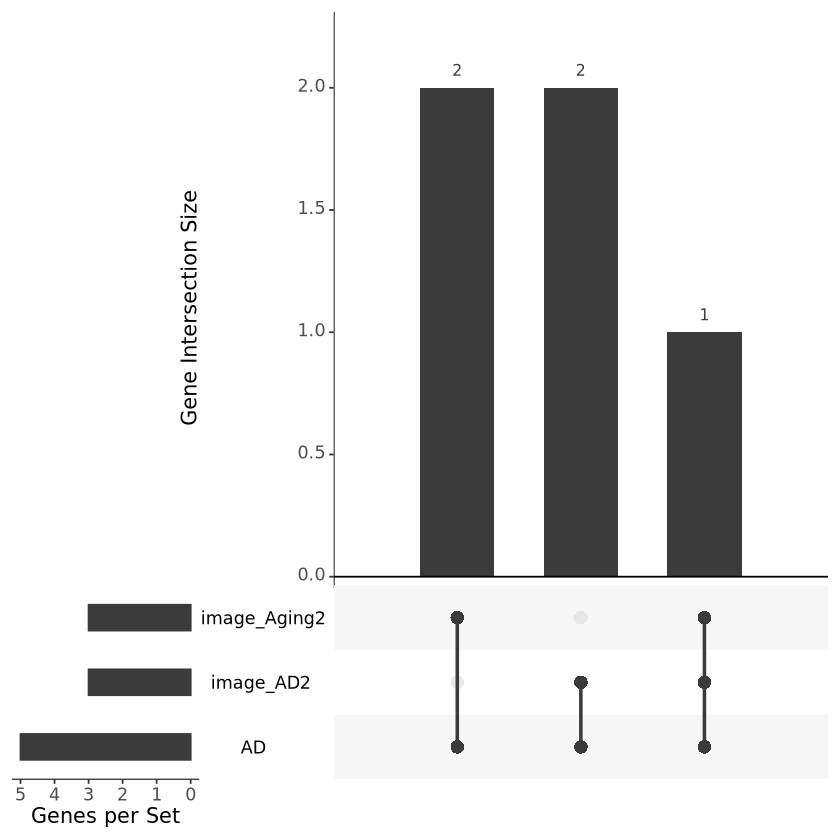

In [2]:
# Install required packages if not already installed
# install.packages("UpSetR")

library(UpSetR)

# Define your gene sets
image_AD2 <- c("NSF", "KANSL1", "TNIP1")
image_Aging2 <- c("SEZ6L2", "TNIP1", "DOC2A")
AD <- c("NSF", "KANSL1", "TNIP1", "SEZ6L2", "DOC2A")

# Create a list of gene sets
gene_sets <- list(
  image_AD2 = image_AD2,
  image_Aging2 = image_Aging2,
  AD = AD
)

# Convert to format required by UpSetR
# Create a binary matrix where rows are genes and columns are sets
all_genes <- unique(unlist(gene_sets))
upset_data <- data.frame(gene = all_genes)

for (set_name in names(gene_sets)) {
  upset_data[[set_name]] <- as.integer(upset_data$gene %in% gene_sets[[set_name]])
}

# Remove the gene column for plotting (but keep it for reference)
rownames(upset_data) <- upset_data$gene
upset_data$gene <- NULL

# Create the UpSet plot
upset(upset_data, 
      sets = names(gene_sets),
      order.by = "freq",
      mainbar.y.label = "Gene Intersection Size",
      sets.x.label = "Genes per Set",
      text.scale = 1.5,
      point.size = 3.5,
      line.size = 1)

In [4]:
# Save the plot as PNG
png("upset_plot_genes.png", width = 10, height = 6, units = "in", res = 300)
upset(upset_data, 
      sets = names(gene_sets),
      order.by = "freq",
      mainbar.y.label = "Gene Intersection Size",
      sets.x.label = "Genes per Set",
      sets.bar.color = "#D8BFD8",  # Light purple for set bars
      main.bar.color = "#FFB6C1",  # Light pink for intersection bars
      matrix.color = "#D8BFD8",    # Light purple for matrix dots
      text.scale = c(1.3, 1.3, 1, 1, 1.5, 1.2),
      point.size = 4,
      line.size = 1.2)
dev.off()

agg_record_650147601 
                   2

agg_record_1047783791 
                    2

UpSet plot saved as 'upset_plot_genes.png' in your working directory

Gene-Trait membership:
NSF :  image_AD2, AD 
KANSL1 :  image_AD2, AD 
TNIP1 :  image_AD2, image_Aging2, AD 
SEZ6L2 :  image_Aging2, AD 
DOC2A :  image_Aging2, AD 


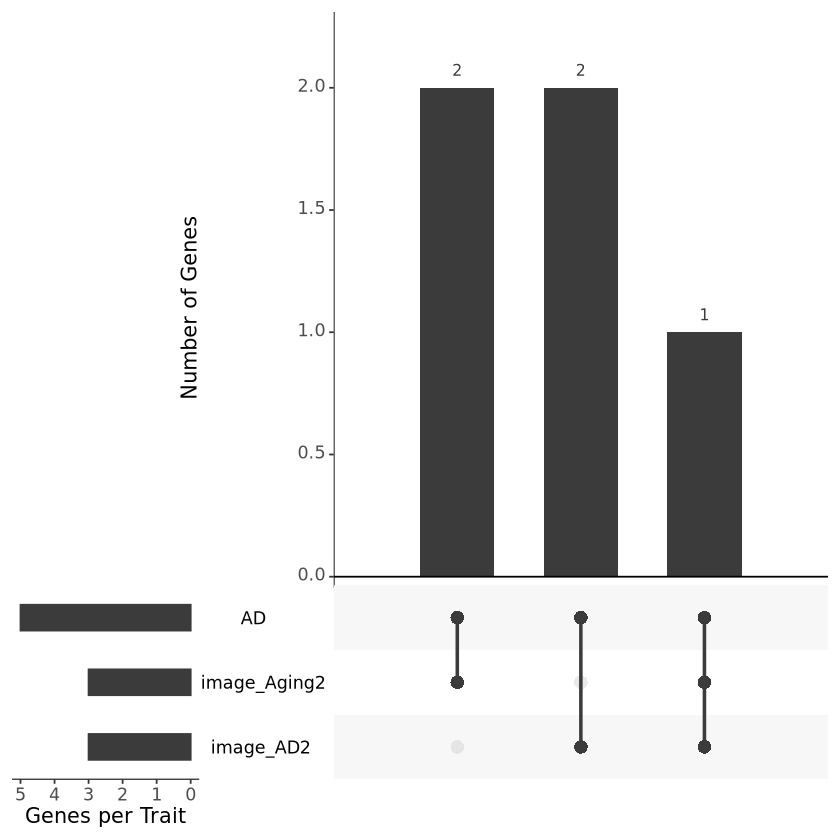

In [9]:
# Install required packages if not already installed
# install.packages("UpSetR")

library(UpSetR)

# Define your gene sets (traits)
image_AD2 <- c("NSF", "KANSL1", "TNIP1")
image_Aging2 <- c("SEZ6L2", "TNIP1", "DOC2A")
AD <- c("NSF", "KANSL1", "TNIP1", "SEZ6L2", "DOC2A")

# Get all unique genes
all_genes <- unique(c(image_AD2, image_Aging2, AD))

# Create a data frame where each row is a gene and columns are traits
upset_data <- data.frame(
  gene = all_genes,
  image_AD2 = as.integer(all_genes %in% image_AD2),
  image_Aging2 = as.integer(all_genes %in% image_Aging2),
  AD = as.integer(all_genes %in% AD)
)

# Set gene names as row names and remove the gene column
rownames(upset_data) <- upset_data$gene
upset_data$gene <- NULL

# Create the UpSet plot
upset(upset_data, 
      sets = c("image_AD2", "image_Aging2", "AD"),
      order.by = "freq",
      keep.order = TRUE,
      mainbar.y.label = "Number of Genes",
      sets.x.label = "Genes per Trait",
      text.scale = 1.5,
      point.size = 3.5,
      line.size = 1)

# Save the plot as PNG
png("upset_plot_genes.png", width = 4, height = 6, units = "in", res = 300)
upset(upset_data, 
      sets = c("image_AD2", "image_Aging2", "AD"),
      order.by = "freq",
      keep.order = TRUE,
      mainbar.y.label = "Number of Genes",
      sets.x.label = "Genes per Trait",
      sets.bar.color = "#D8BFD8",  # Light purple for trait bars
      main.bar.color = "#FFB6C1",  # Light pink for intersection bars
      matrix.color = "#D8BFD8",    # Light purple for matrix dots
      text.scale = c(1.3, 1.3, 1, 1, 1.5, 1.2),
      point.size = 4,
      line.size = 1.2)
dev.off()

cat("UpSet plot saved as 'upset_plot_genes.png' in your working directory\n")

# Print which genes belong to which trait combinations
cat("\nGene-Trait membership:\n")
for (gene in rownames(upset_data)) {
  traits <- c()
  if (upset_data[gene, "image_AD2"] == 1) traits <- c(traits, "image_AD2")
  if (upset_data[gene, "image_Aging2"] == 1) traits <- c(traits, "image_Aging2")
  if (upset_data[gene, "AD"] == 1) traits <- c(traits, "AD")
  cat(gene, ": ", paste(traits, collapse = ", "), "\n")
}